In [16]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase

In [23]:
rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.2

# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# number of batches and MC runs
n_batch = 7;
n_rep = 6;

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);

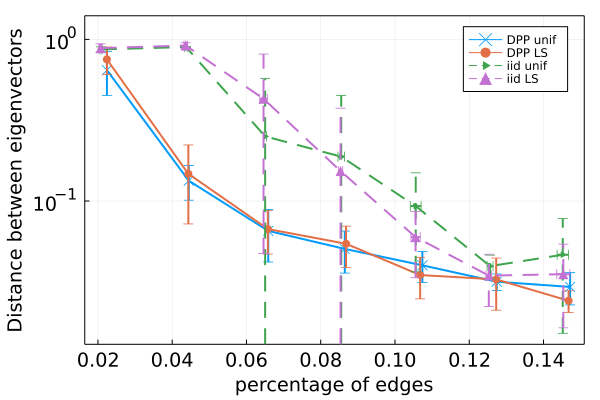

In [24]:

method =  "DPP unif"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
framestyle = :box,
margins = 0.1*2Plots.cm)

method =  "DPP LS"
D = D_all[method]
x = D["percent_edges"]
y = D["err"]
y_er = D["err_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]
x = D["percent_edges"]
x_er = D["percent_edges_std"]

y = D["err"]
y_er = D["err_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
linewidth=2,
markerstrokewidth=2)

ylims!((1.3*1e-2,1.4))

xlabel!("percentage of edges")
ylabel!("Distance between eigenvectors")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"EigenDistance_norm.pdf"
# savefig(foldername*name)

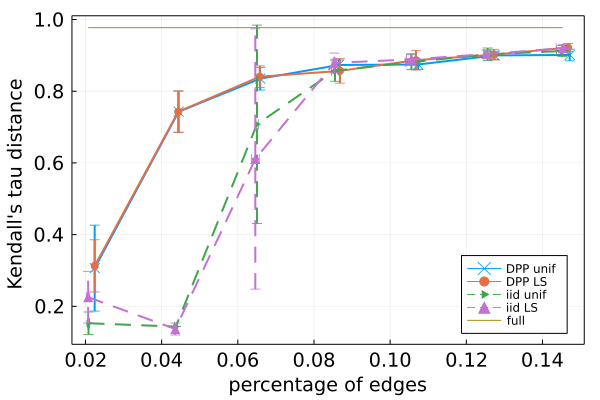

In [25]:
method =  "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13))

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
y_er = D["tau_std"]

plot!(x,y,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method =  "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:rtriangle,
linewidth=2,
markerstrokewidth=2)

method =  "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["tau"]
x_er = D["percent_edges_std"]
y_er = D["tau_std"]

plot!(x,y,
xerror=x_er,
yerror=y_er,
labels = method,
markerstrokecolor=:auto,
markersize = 5,
linestyle=:dash,
markershape=:utriangle,
legend=:bottomright,
linewidth=2,
markerstrokewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm)

x = D["percent_edges"]
y = D["tau_full"]*ones(size(x))
plot!(x,y, labels = "full")


xlabel!("percentage of edges")
ylabel!("Kendall's tau distance ")

# foldername = "figures/"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"Kendall_norm.pdf"
# savefig(foldername*name)
